In [1]:
import sys
sys.path.append("..")
import extract

In [2]:
local = extract.medsl_local()

In [3]:
local.shape

(484350, 25)

In [4]:
local.head()

,precinct,office,party_detailed,party_simplified,mode,votes,county_name,county_fips,jurisdiction_name,jurisdiction_fips,...,stage,state,special,writein,state_po,state_fips,state_cen,state_ic,date,readme_check
0,06-020 CHISTOCHINA,DISTRICT COURT,NaN,NaN,ELECTION DAY,33,NaN,NaN,DISTRICT 6,02006,...,GEN,ALASKA,False,False,AK,02,94,81,2020-11-03,False
1,06-020 CHISTOCHINA,DISTRICT COURT,NaN,NaN,ELECTION DAY,24,NaN,NaN,DISTRICT 6,02006,...,GEN,ALASKA,False,False,AK,02,94,81,2020-11-03,False
2,06-020 CHISTOCHINA,DISTRICT COURT,NaN,NaN,ELECTION DAY,33,NaN,NaN,DISTRICT 6,02006,...,GEN,ALASKA,False,False,AK,02,94,81,2020-11-03,False
3,06-020 CHISTOCHINA,DISTRICT COURT,NaN,NaN,ELECTION DAY,24,NaN,NaN,DISTRICT 6,02006,...,GEN,ALASKA,False,False,AK,02,94,81,2020-11-03,False
4,06-020 CHISTOCHINA,DISTRICT COURT,NaN,NaN,ELECTION DAY,32,NaN,NaN,DISTRICT 6,02006,...,GEN,ALASKA,False,False,AK,02,94,81,2020-11-03,False


In [5]:
local.columns

Index(['precinct', 'office', 'party_detailed', 'party_simplified', 'mode',
       'votes', 'county_name', 'county_fips', 'jurisdiction_name',
       'jurisdiction_fips', 'candidate', 'district', 'magnitude', 'dataverse',
       'year', 'stage', 'state', 'special', 'writein', 'state_po',
       'state_fips', 'state_cen', 'state_ic', 'date', 'readme_check'],
      dtype='object')

In [6]:
# string - The field which contains the name of the elected position for the race.
local.office.value_counts()

COUNTY BOARD OF EDUCATION                                                                                63774
DISTRICT COURT JUDGE                                                                                     62460
COUNTY BOARD OF COMMISSIONERS                                                                            58020
SOIL AND WATER CONSERVATION DISTRICT SUPERVISOR - WAKE                                                   41720
RETENTION COUNTY COURT                                                                                   20464
                                                                                                         ...  
QUESTION TO IMPOSE AN ADDITIONAL ONE PERCENT (1%) RESORT TAX TO BE COLLECTED FOR SEWER INFRASTRUCTURE        2
COUNTY CLERK AND RECORDER/CLERK OF DISTRICT COURT                                                            1
PRECINCT 10: FOR COUNCIL WARD 3                                                                              1
P

In [7]:
# string - The party name for the given entry. Propositions, amendments, and other referenda are left as blank "".
local.party_detailed.value_counts(dropna=False)

NONPARTISAN                217686
DEMOCRAT                    97713
REPUBLICAN                  75413
NaN                         73886
INDEPENDENT                 16261
LIBERTARIAN                  1702
UNITY OF COLORADO             473
DEMOCRAT-REPUBLICAN           463
REPUBLICAN-DEMOCRAT           252
GREEN                         220
CONSTITUTION                  174
UNENROLLED                     38
DEMOCRAT-PROGRESSIVE           23
PISCATAQUIS INDEPENDENT        21
PROGRESSIVE                    16
GG                              9
Name: party_detailed, dtype: int64

In [8]:
# string - The party name for the given entry simplified to one of the following: DEMOCRAT, REPUBLICAN, LIBERTARIAN, OTHER, and NONPARTISAN. Propositions, amendments, and other referenda are left as blank "".
local.party_simplified.value_counts(dropna=False)

NONPARTISAN    217686
DEMOCRAT        97713
REPUBLICAN      75413
NaN             73886
OTHER           17950
LIBERTARIAN      1702
Name: party_simplified, dtype: int64

In [9]:
# string - The voting mode for how the election results are reported. For results that do not offer disaggregation by mode, it will be "TOTAL". For other states that do offer the distinction, then some common entries might include: ABSENTEE, ELECTRONIC, ELECTION DAY, PROVISIONAL, ONE-STOP, etc.
local["mode"].value_counts(dropna=False)

ELECTION DAY        112110
TOTAL                94473
PROVISIONAL          83653
ONE STOP             83035
ABSENTEE BY MAIL     82976
ABSENTEE              8713
EARLY VOTING          7462
MAIL BALLOTS          7026
EARLY                 4902
Name: mode, dtype: int64

<AxesSubplot:ylabel='Frequency'>

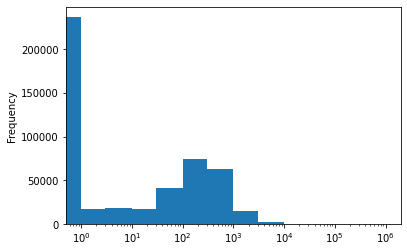

In [10]:
# int - The numeric value of votes for a given entry.
# Almost half of these values are zeros, which is higher than I'd expect
local.votes.plot(kind="hist", logx=True, bins=[0,1,3,10,30,100,300,1e3,3e3,1e4,3e4,1e5,3e5,1e6])

In [11]:
local[local.votes == 0].head()

,precinct,office,party_detailed,party_simplified,mode,votes,county_name,county_fips,jurisdiction_name,jurisdiction_fips,...,stage,state,special,writein,state_po,state_fips,state_cen,state_ic,date,readme_check
3038,37-710 CLARK'S POINT,DISTRICT COURT,NaN,NaN,ELECTION DAY,0,NaN,NaN,DISTRICT 37,02037,...,GEN,ALASKA,False,False,AK,02,94,81,2020-11-03,False
3039,37-710 CLARK'S POINT,DISTRICT COURT,NaN,NaN,ELECTION DAY,0,NaN,NaN,DISTRICT 37,02037,...,GEN,ALASKA,False,False,AK,02,94,81,2020-11-03,False
3040,37-710 CLARK'S POINT,DISTRICT COURT,NaN,NaN,ELECTION DAY,0,NaN,NaN,DISTRICT 37,02037,...,GEN,ALASKA,False,False,AK,02,94,81,2020-11-03,False
3041,37-710 CLARK'S POINT,DISTRICT COURT,NaN,NaN,ELECTION DAY,0,NaN,NaN,DISTRICT 37,02037,...,GEN,ALASKA,False,False,AK,02,94,81,2020-11-03,False
3042,37-710 CLARK'S POINT,DISTRICT COURT,NaN,NaN,ELECTION DAY,0,NaN,NaN,DISTRICT 37,02037,...,GEN,ALASKA,False,False,AK,02,94,81,2020-11-03,False


In [12]:
# string - The candidate name.
# NOTE: Retention elections include the name of the candidate and the yes/no option
local.candidate.value_counts(dropna=False)

WRITEIN            37965
NO                 14499
YES                14498
CHARLES GILLIAM     2384
MARY BETH MOORE     1632
                   ...  
SHARON LEARY           1
WILLIAM BEZIO          1
YEEZY                  1
ALEX MORGAN            1
TOM CROWE              1
Name: candidate, Length: 6382, dtype: int64

In [13]:
# string - The district identifier for the race, given that it is substate. If the district is a state legislative or U.S. House race, then the district is string padded to be 3 digits long and with zeroes, i.e. State Senate district 3 would be equal to "003". Other substate units (wards, seats, etc) with multiple level are included if given, i.e. State District Court of the Sixth district and seat C, would be "006, seat C". For candidates with state wide jurisdictions, district is "STATEWIDE". For races without district info, the field is left blank "".
local.district.value_counts(dropna=False)

NaN             280494
002              17421
001              17225
003              16161
004              14545
                 ...  
ROUND HILL           6
001, AREA 2          5
UNIT 17, 004         3
I                    3
UNIT 17, 002         1
Name: district, Length: 555, dtype: int64

In [14]:
# int - The number of candidates voted for in a given office-district race. The default is 1 (i.e. a single member winner take all district), with multimember districts having a magnitude matching the number of candidates who can win a race. This will be more common in local races and a select few states for their state house (i.e. NH).
local.magnitude.value_counts(dropna=False)

1    416190
3     29427
2     15188
4     14429
5      6515
7      2574
9        27
Name: magnitude, dtype: int64

In [15]:
local.dataverse.value_counts()

LOCAL    484350
Name: dataverse, dtype: int64

In [16]:
local.year.value_counts()

2020    484350
Name: year, dtype: int64

In [17]:
local.stage.value_counts()

GEN    484350
Name: stage, dtype: int64

In [18]:
local.special.value_counts(dropna=False)

False    481764
True       2586
Name: special, dtype: int64

In [19]:
local.writein.value_counts(dropna=False)

False    363726
True     120624
Name: writein, dtype: int64

In [20]:
local.date.value_counts()

2020-11-03    484350
Name: date, dtype: int64

In [21]:
local.readme_check.value_counts()

False    484031
True        319
Name: readme_check, dtype: int64